# Demo

The `mfanalysis` package allows us to perform fractal and multifractal analysis of signals

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
sns.set(style="darkgrid")

## Generating signals

Let's first generate a brownian motion (fractional brownian motion with H=0.5)

In [5]:
from mfanalysis.generate_data import generate_fbm_path

In [6]:
X = generate_fbm_path(5000, 0.5)[:, 0]

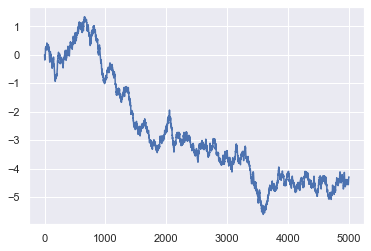

In [7]:
plt.plot(X)
plt.show()

## Second order analysis

Second order analysis is done with the `psd` module

The sampling frequency `fs` is necessary in order to correctly label the frequency axis

In [8]:
import mfanalysis.psd as psd

In [9]:
fs = 1000

> /home/dumeur/Multifracs/mfanalysis/mfanalysis/psd.py(57)plot_psd()
     55     psd = [psd_fourier, psd_wavelet]
     56     from IPython.core.debugger import Pdb; Pdb().set_trace()
---> 57     legend = ['Fourier', 'Wavelet']
     58     log_plot(freq, psd, legend, log=log)
     59 



ipdb>  freq_fourier.shape


(2049,)


ipdb>  psd_fourier.shape


(2049,)


ipdb>  continue


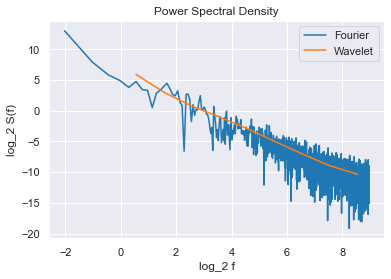

In [10]:
psd.plot_psd(X, fs)

The Fourier-based PSD estimation is done using the Welch estimator.

The arguments relative the Fourier-based estimation are:
* `n_fft`: length of the FFT used
* `seg_size`: size of the segment used in the Welch estimation

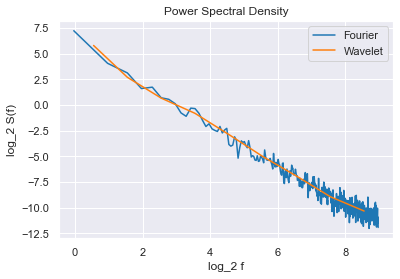

In [11]:
psd.plot_psd(X, fs, n_fft=1024)

The Wavelet-based estimation is done using wavelet analysis based on the Daubechies wavelet.

The number of vanishing moments can be controlled using the `n_moments` argument

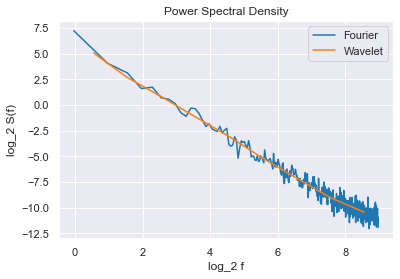

In [12]:
psd.plot_psd(X, fs, n_moments=3, n_fft=1024)

## Estimating beta

Our model for the power density spectrum is as follows:

$$ \Gamma(\nu) = C \left| \nu \right| ^ {\beta}$$

Using the log-log plot we can then easily estimate $beta$ by performing a linear regression over the wavelet PSD estimate

In [13]:
import mfanalysis.fractal_analysis as fa

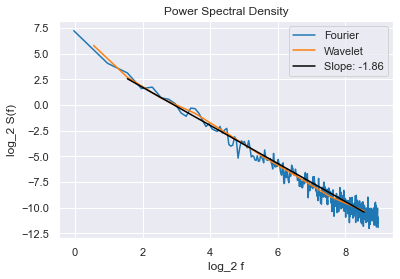

In [14]:
fa.plot_fractal(X, fs, freq_band=(2, 512), n_fft=1024)

The `freq_band` parameter controls the frequency support for the $\beta$ estimation

The `log` parameter allows us to control the log function used, which changes the axes values but not the plotted curves. Available values are contained in the `psd.log_function` dictionary

In [15]:
[*psd.log_function]

['log2', 'log']

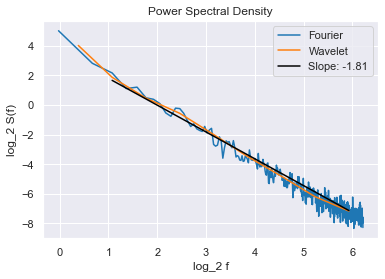

In [16]:
fa.plot_fractal(X, fs, freq_band=(2, 512), n_fft=1024, log='log')

## Wavelet Transform

Wavelet transform is performed in the package using the `wavelet` submodule

In [17]:
from mfanalysis.wavelet import wavelet_analysis

TODO: detail the wavelet transform

In [18]:
WT = wavelet_analysis(X)

/home/dumeur/Multifracs/mfanalysis/mfanalysis/wavelet.py:88: UserWarning: Value of j2 is higher than the maximum allowed level. Max level and j2 set to 9
  f"Max level and j2 set to {max_level}", UserWarning)


The output is a namedtuple with 3 fields:

* `wt_leaders`: The wavelet leaders if computed
* `wt_coefs`: Wavelet coefficients
* `j2_eff`: Maximum scale that the coefficients were effectively computed for

## Multifractal Analysis

Multifractal analysis is done using the `mf_analysis` submodule

In [19]:
import mfanalysis.mf_analysis as mf

In [21]:
import numpy as np

Basic parameters are:

`j1` and `j2`, which indicate respectively the minimum and the maximum scale to consider when fitting wavelet coefficients

`q` The values of q for which the wavelet coefficients will be estimated

`n_cumul` The maximum order of the cumulants to compute

In [24]:
sf, cum, mfs = mf.mf_analysis_full(X,
    j1=10, j2=14,
    q=np.arange(-2,3),
    n_cumul=2,
)

In [31]:
sf

In [30]:
cum

In [32]:
mfs